## 데이터 전처리 및 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(len(df_train), len(df_test))
df_train.head()

891 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age, Cabin, Embarked에 결측치가 존재
- 특히 Cabin은 700개 이상이 결측치임

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

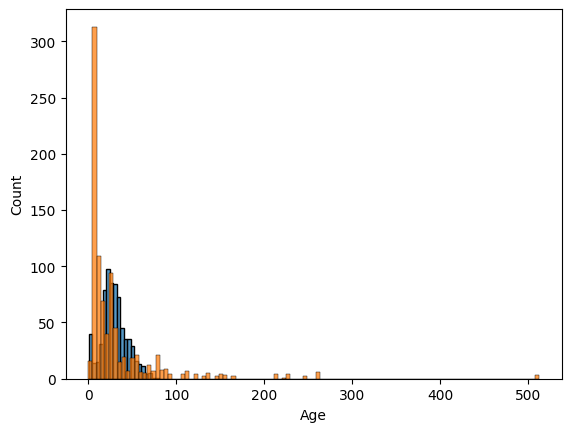

In [5]:
# 여기서 선형적인 값들을 한번 시각화해보는 것
sns.histplot(df_train['Age'])
sns.histplot(df_train['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

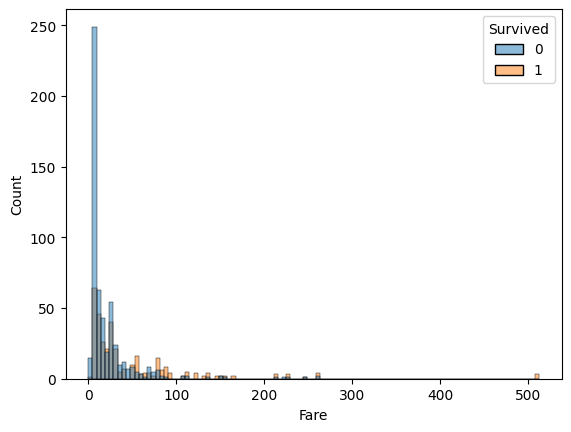

In [6]:
# 여기서 선형적인 값들을 한번 시각화해보는 것
sns.histplot(x=df_train['Fare'], hue=df_train['Survived'])

- 히트맵 그리기 코드 암기 필요

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


<Axes: >

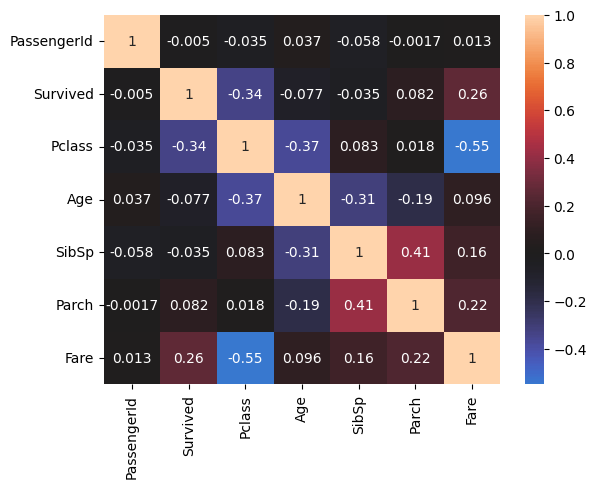

In [7]:
num_cols = df_train.dtypes[df_train.dtypes != "object"].index.to_list()
print(num_cols)
corr = df_train[num_cols].corr()
sns.heatmap(corr, annot=True, center=0)

In [8]:
# survived와 얼마나 연관관계가 있는가
corr['Survived'].abs().sort_values(ascending=False)

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


- Pclass, Fare, Parch 순으로 corr이 높음을 알 수 있음

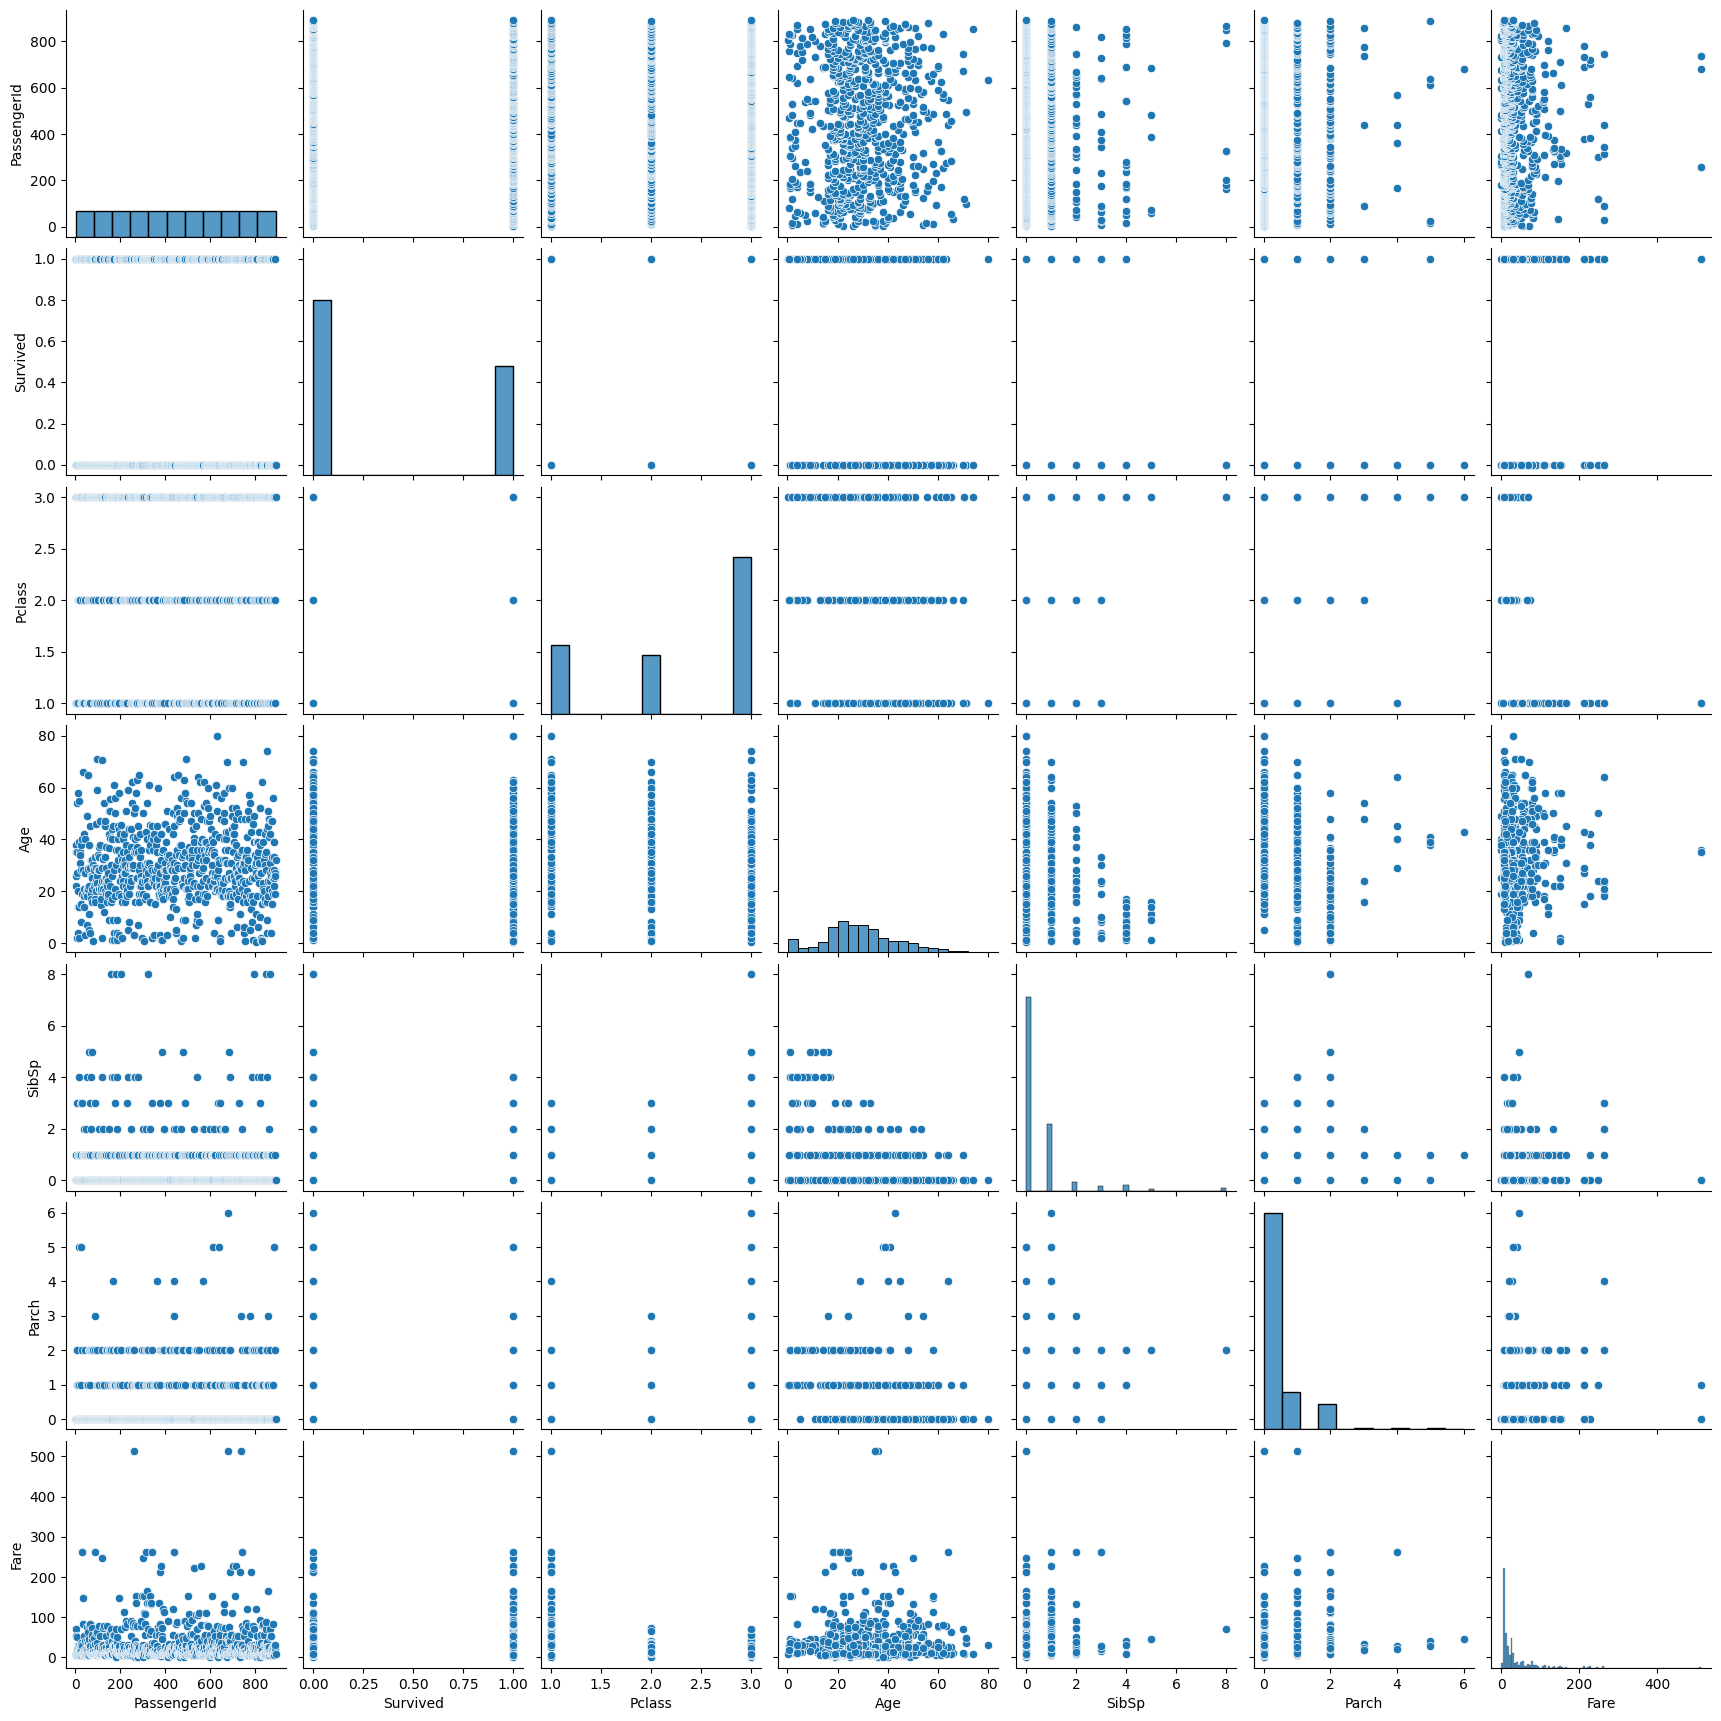

In [9]:
# 종합적으로 그래프 모두 출력
sns.pairplot(df_train)

In [10]:
target_col = 'Survived'
df_train[target_col].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


### 결측치 처리

In [11]:
# Train 에서는 Age, Cabin, Embarked
# Testst에서는 Age, Fare, Cabin이 결측값이 존재함
print(df_train.isnull().sum().sort_values(ascending=False))
print(df_test.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64
Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


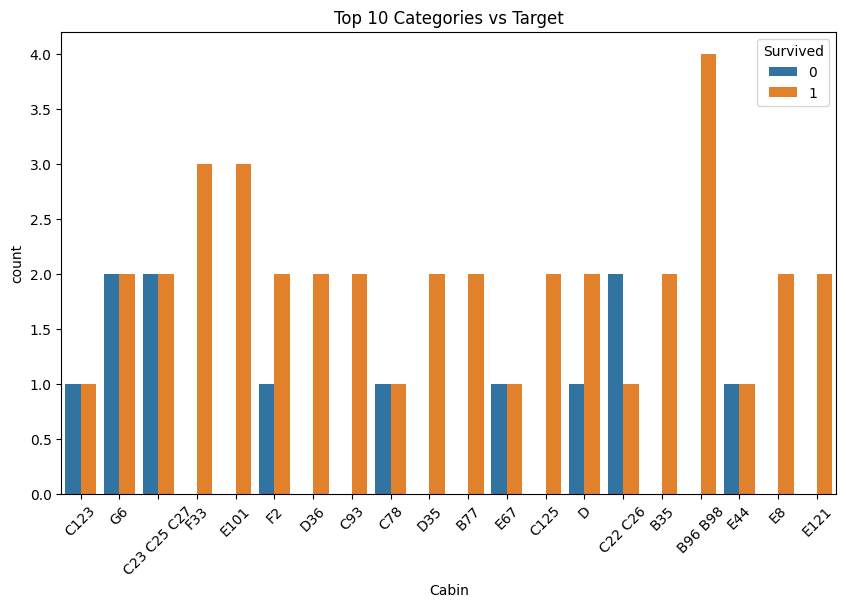

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [12]:
# sns.countplot(x="Cabin", hue=target_col, data=df_train)

top_categories = df_train['Cabin'].value_counts().index[:20]
filtered_data = df_train[df_train['Cabin'].isin(top_categories)]
# 상위 10개 범주와 타겟 값의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Cabin', hue=target_col)
plt.xticks(rotation=45)
plt.title("Top 10 Categories vs Target")
plt.show()
print(df_train['Cabin'].unique())


In [13]:
def get_first_cabin(value):
  if pd.isnull(value):
    return "Unknown"
  else:
    return value[0]

# 선실을 A,B,C<D<E로 통일하고 null값은 Unknown처리
df_train['Cabin'] = df_train['Cabin'].apply(get_first_cabin)

['Unknown' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['Unknown' 'B' 'E' 'A' 'C' 'D' 'F' 'G']


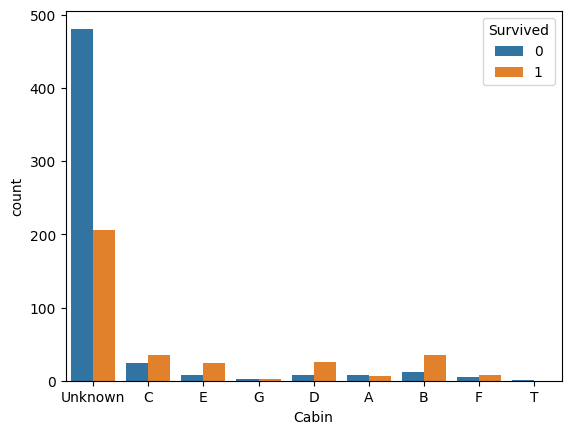

In [14]:
df_test['Cabin'] = df_test['Cabin'].apply(get_first_cabin)

sns.countplot(x='Cabin', hue=target_col, data=df_train)

print(df_train['Cabin'].unique())
print(df_test['Cabin'].unique())

In [15]:
corr[target_col]

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


<Axes: xlabel='Age', ylabel='count'>

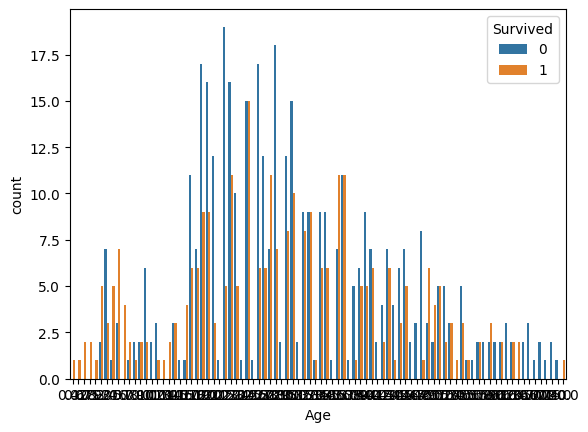

In [16]:
sns.countplot(x="Age", hue=target_col, data=df_train)

<Axes: xlabel='Age', ylabel='Count'>

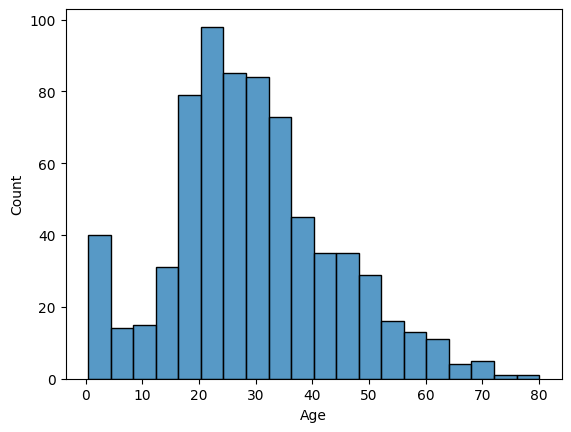

In [17]:
sns.histplot(df_train.Age)

In [18]:
# 나이는 평균값으로,
df_train['Age'] = df_train['Age'].fillna(df_train.Age.mean())
df_test['Age'] = df_test['Age'].fillna(df_test.Age.mean())
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64


In [19]:
# 평균값으로 대체
df_test['Fare'] = df_test['Fare'].fillna(df_test.Fare.mean())

<Axes: xlabel='Embarked', ylabel='count'>

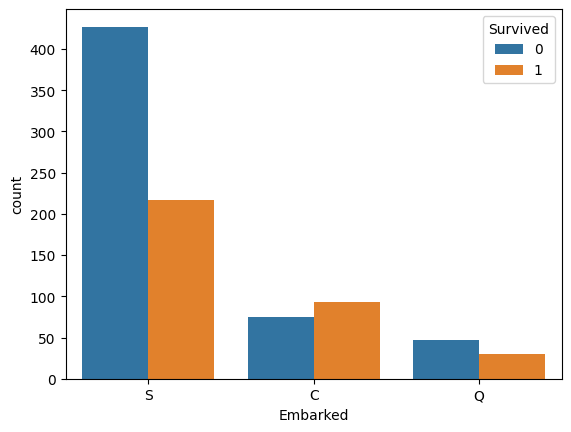

In [20]:
sns.countplot(x="Embarked", hue=target_col, data=df_train)

In [21]:
# 2개의 결측치는 최빈값으로,
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 인코딩

In [22]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerID, Name은 각 고유값이 명확한 변수
- Pclass는 카테고리 데이터
- Sex는 이진화 필요
- Age는 연속형 변수
- Ticket 확인 필요
- Name, Sex / Cabin, Embarked -> 범주형 인코딩
- Age, SibSp, Parch, Fare -> 확인 후, 스케일링

In [24]:
print(len(df_train["PassengerId"].unique()))
print(len(df_train["Name"].unique()))
print(corr['Survived'])

# 드랍하는 과정을 거침
df_train_drop = df_train.drop(["PassengerId", "Name"], axis=1)
print(df_train_drop)

891
891
PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64
     Survived  Pclass     Sex        Age  SibSp  Parch            Ticket  \
0           0       3    male  22.000000      1      0         A/5 21171   
1           1       1  female  38.000000      1      0          PC 17599   
2           1       3  female  26.000000      0      0  STON/O2. 3101282   
3           1       1  female  35.000000      1      0            113803   
4           0       3    male  35.000000      0      0            373450   
..        ...     ...     ...        ...    ...    ...               ...   
886         0       2    male  27.000000      0      0            211536   
887         1       1  female  19.000000      0      0            112053   
888         0       3  female  29.699118      1      2        W./C. 6607   
889         1       1    male  26

In [26]:
# 드랍하는 과정을 거침
df_test_drop = df_test.drop(["PassengerId", "Name"], axis=1)
print(df_test_drop.head())

   Pclass     Sex   Age  SibSp  Parch   Ticket     Fare    Cabin Embarked
0       3    male  34.5      0      0   330911   7.8292  Unknown        Q
1       3  female  47.0      1      0   363272   7.0000  Unknown        S
2       2    male  62.0      0      0   240276   9.6875  Unknown        Q
3       3    male  27.0      0      0   315154   8.6625  Unknown        S
4       3  female  22.0      1      1  3101298  12.2875  Unknown        S


In [27]:
# 이진화 인코딩
df_train_drop["Sex"] = df_train_drop["Sex"].replace({"male" : 0, "female" : 1})
df_test_drop["Sex"] = df_test_drop["Sex"].replace({"male" : 0, "female" : 1})

<ipython-input-27-94c9852a94e1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train_drop["Sex"] = df_train_drop["Sex"].replace({"male" : 0, "female" : 1})
<ipython-input-27-94c9852a94e1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_drop["Sex"] = df_test_drop["Sex"].replace({"male" : 0, "female" : 1})


In [37]:
# Cabin, Embarked -> onehot 인코딩
onehot_encoder = OneHotEncoder(sparse_output=False)
mul_cols = ["Cabin", "Embarked"]
encoded_train = onehot_encoder.fit_transform(df_train_drop[mul_cols])
encoded_test = onehot_encoder.transform(df_test_drop[mul_cols])

cols = onehot_encoder.get_feature_names_out(mul_cols)
encoded_train_df = pd.DataFrame(encoded_train, columns=cols)
encoded_test_df = pd.DataFrame(encoded_test, columns=cols)
encoded_train_df

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
temp_train = df_train_drop.drop(mul_cols, axis=1)
temp_test = df_test_drop.drop(mul_cols, axis=1)

df_train_encoded = pd.concat([encoded_train_df, temp_train], axis=1)
df_test_encoded = pd.concat([encoded_test_df, temp_test], axis=1)
print(df_train_encoded.head())
print(df_test_encoded.head())

   Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   Cabin_Unknown  Embarked_C  Embarked_Q  Embarked_S  Survived  Pclass  Sex  \
0            1.0         0.0         0.0         1.0         0       3    0   
1            0.0         1.0         0.0         0.0         1       1    1   
2            1.0         0.0         0.0         1.0         1       3    1   
3            0.0         0.0         0.0         1.0         1       1    1   
4            1.0         0.0         0.0         1.0         0       3    0   

    Age  SibSp  Parch            Ticket     Fare  
0  22.0    

In [39]:
print(sorted(df_train["SibSp"].unique()))
print(sorted(df_test["SibSp"].unique()))
print(sorted(df_train["Parch"].unique()))
print(sorted(df_test["Parch"].unique()))

[0, 1, 2, 3, 4, 5, 8]
[0, 1, 2, 3, 4, 5, 8]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 9]


<Axes: xlabel='Parch', ylabel='count'>

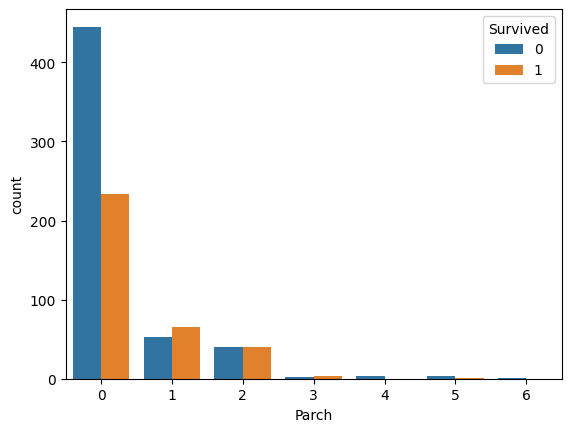

In [40]:
sns.countplot(x='Parch', hue=target_col, data=df_train)

- SibSbp, Parch는 OneHotEcoding할 것

In [45]:
# 빈도 계산
df_train_encoded["Ticket"].value_counts().sort_values(ascending=False)

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
2683,1
SOTON/O2 3101287,1
11774,1


In [47]:
df_train_encoded["Ticket_type"] = df_train_encoded["Ticket"].map(df_train_encoded['Ticket'].value_counts())
df_test_encoded["Ticket_type"] = df_test_encoded["Ticket"].map(df_test_encoded['Ticket'].value_counts())
print(df_train_encoded.head())

   Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   Cabin_Unknown  Embarked_C  ...  Embarked_S  Survived  Pclass  Sex   Age  \
0            1.0         0.0  ...         1.0         0       3    0  22.0   
1            0.0         1.0  ...         0.0         1       1    1  38.0   
2            1.0         0.0  ...         1.0         1       3    1  26.0   
3            0.0         0.0  ...         1.0         1       1    1  35.0   
4            1.0         0.0  ...         1.0         0       3    0  35.0   

   SibSp  Parch            Ticket     Fare  Ticket_type  
0      1  

In [48]:
df_train_encoded = df_train_encoded.drop(['Ticket'], axis=1)
df_test_encoded = df_test_encoded.drop(['Ticket'], axis=1)

In [49]:
df_train_encoded.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,3,0,22.0,1,0,7.2500,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,38.0,1,0,71.2833,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,3,1,26.0,0,0,7.9250,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,35.0,1,0,53.1000,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,3,0,35.0,0,0,8.0500,1


## 데이터 분할 및 스케일링

In [57]:
#외우기
from sklearn.model_selection import train_test_split

x = df_train_encoded.drop(["Survived"], axis=1)
y = df_train_encoded[["Survived"]]
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_val))

712 179


<Axes: xlabel='Fare', ylabel='Count'>

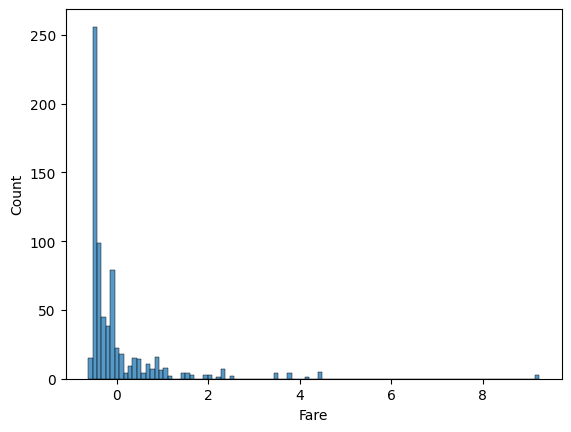

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# MinMaxScaler -> 예측보다는 회귀에 사용할 것

numeric_cols = ["Age", "Fare"]
# Fare와 Age만 적용
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

sns.histplot(X_train["Fare"])

<Axes: xlabel='Age', ylabel='Count'>

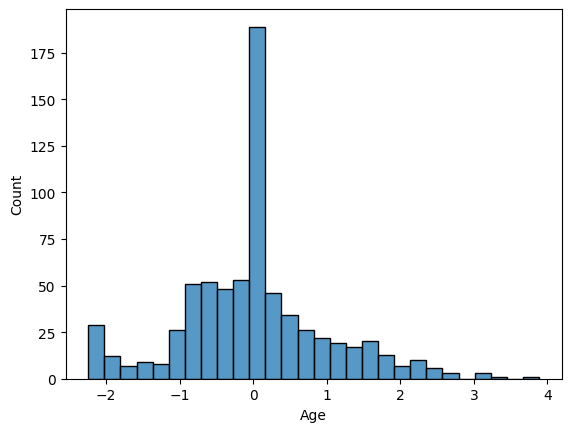

In [59]:
sns.histplot(X_train["Age"])

## 학습

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
# 외우기
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_predict = gb.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
print(y_predict)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1]


In [75]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix

print(acc(y_val, y_predict))
confusion_matrix(y_val, y_predict)

0.8044692737430168


array([[90, 15],
       [20, 54]])

### 테스트 CSV에 적용

In [77]:
df_test_encoded.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_C,Embarked_Q,Embarked_S,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,0,34.5,0,0,7.8292,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,1,47.0,1,0,7.0000,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0,62.0,0,0,9.6875,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0,27.0,0,0,8.6625,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,1,22.0,1,1,12.2875,1


<Axes: xlabel='Fare', ylabel='Count'>

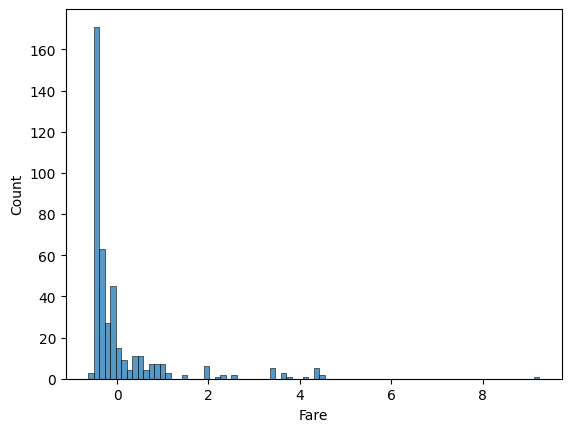

In [78]:
numeric_cols = ["Age", "Fare"]
# Fare와 Age만 적용
df_test_encoded[numeric_cols] = scaler.transform(df_test_encoded[numeric_cols])

sns.histplot(df_test_encoded["Fare"])

In [80]:
df_test_encoded

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_C,Embarked_Q,Embarked_S,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,0,0.382104,0,0,-0.476712,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,1,1.344722,1,0,-0.492678,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0,2.499863,0,0,-0.440929,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0,-0.195467,0,0,-0.460666,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,1,-0.580515,1,1,-0.390865,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0,0.056553,0,0,-0.472460,1
414,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.728646,0,0,1.469464,1
415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0,0.690141,0,0,-0.487864,1
416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0,0.056553,0,0,-0.472460,1


In [79]:
y_predict = gb.predict(df_test_encoded)
print(y_predict)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [85]:
df_test["Survived"] = y_predict
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Unknown,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,Unknown,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Unknown,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,Unknown,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,Unknown,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,Unknown,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,Unknown,S,0


In [86]:
df_test.to_csv('test.csv', index=False)